# Modelling 1D particle-wall collisions

In the previous interactive example, we modelled the simple case of a particle in free flight. A key feature of DEM, however, is the ability to model collisions between particles and other objects. In this example, we model the simplest such case, namely a one-dimensional collision between a particle and a flat wall.

As before, we start by importing the relevant Python libraries:

In [1]:
# Importing the relevant libraries
import numpy as np              # Useful mathematical functions
import matplotlib.pyplot as plt # Useful plotting functions

In the below code, we define the relevant properties of a particle and the system in which it exists. As before, for simplicity, let us assume for the moment that the particle is pointlike, and consider only a particle initially at rest (v = 0) and which is exposed to no forces other than gravity. In this case, however, we also need to think about defining some properties to describe our particle's collisions with other objects - namely the coefficient of restitution. For simplicity, for the moment we will consider only direct, "head-on" collisions with no particle rotation, meaning we don't need to worry about tangential restitution coefficients or frictional coefficients.

In [2]:
e = 0.9 # defining a restitution coefficient.
#Note that in this simple code there are no "checks" stopping us from setting an unphysically high or low restitution coefficient!

z = 1     # defining an initial height from which the particle will be dropped. Default set as 1 m

v = 0

g = -9.81 # Defining the gravitational acceleration


In the next code block, just as in our simple free-flight code, we now need to define some properties for the simulation (how long we want it to run for, and what time step we would like to use...) and create a "while" loop that allows us to "step through time". For this example, to maximise speed and simplicity (and give the user more enlightening opportunities to deliberately "break" the model) we return to the use of the Euler method.

You will notice that the vast majority of the code is identical to that in the previous example, with one notable difference: an "if statement" which reverses the velocity of our particle and reduces it by a factor of e if its vertical position (z) falls below zero - i.e. if our particle hits the floor, it bounces and loses some energy!

Text(0, 0.5, 'z (m)')

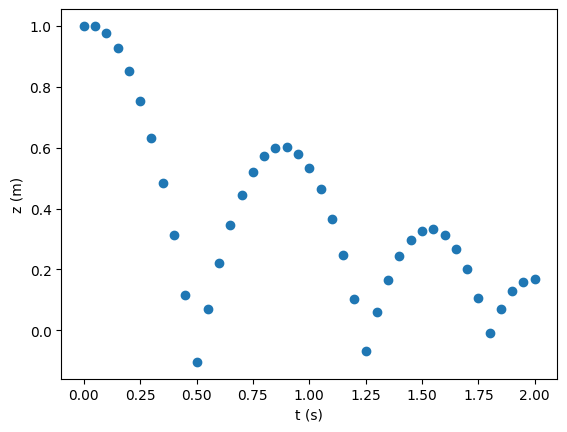

In [3]:
t_max = 2   # The total length of time (in seconds) we wish to simulate

t = 0       # setting the initial, starting time as zero

dt = 0.05   # Setting the timestep

# Defining a pair of arrays to save data at every timestep
t_array = np.array([t])
z_array = np.array([z])

while t < t_max :

  z = z + v * dt

  # Determining if the particle hits the floor during the current timestep
  if z <= 0:
    # If particle hits the floor, reversing its velocity and reducing it by a factor of e to imitate a dissipative collision
    v = -e * v

  v = v + g * dt

  t = t + dt

  t_array = np.append(t_array,t)
  z_array = np.append(z_array,z)

plt.scatter(t_array,z_array)
plt.xlabel('t (s)')
plt.ylabel('z (m)')

**Question**: What happens if you adjust the timestep and restitution coefficient? Does this agree with your expectation from the Chapter?

**Question**: What happens for very low values of dt and e? Why does this happen? Can you think how this might be fixed?

Finally, let's try and make the example a bit more realistic by giving the particle a physical size, and also make some prettier visualisations.

Note that the visualisation part is quite compute-intensive, so don't worry if this code block takes a minute or two to run. If the computer is _really_ struggling, try reducing the timestep and/or t_max!

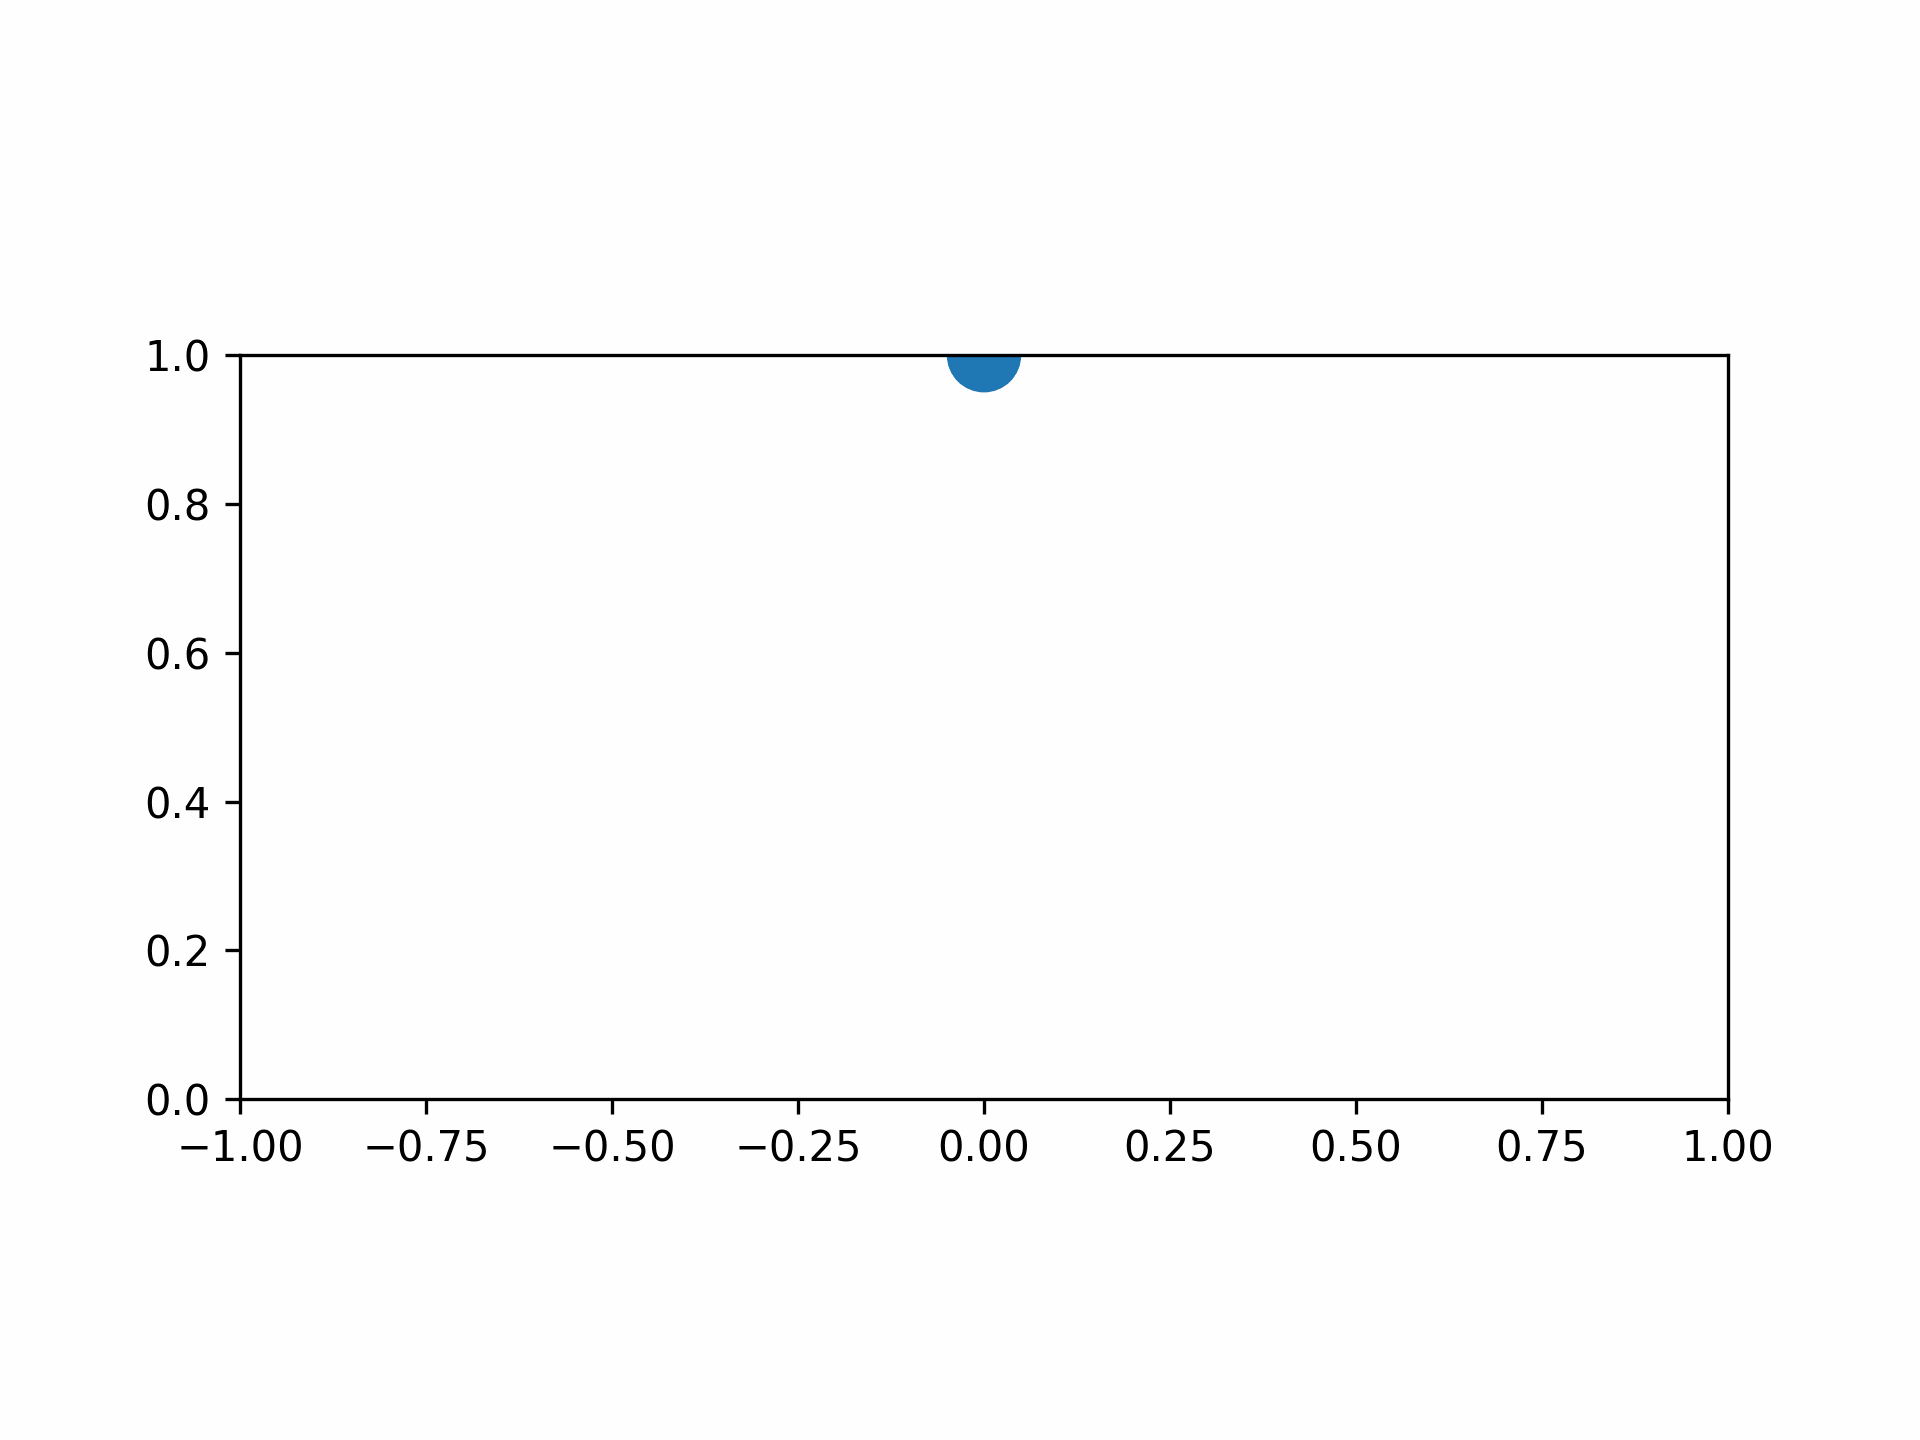

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.animation as ani

# Setting a particle diameter
r = 0.05

# Setting up an array to store individual frames to make video
frames = []
fig = plt.figure()

# Resetting key variables and arrays
dt = 0.005

t = 0
z = 1
v = 0

t_array = np.array([t])
z_array = np.array([z])

while t < t_max :

  z = z + v * dt

  # Now checking if the *edge* of the particle hits the floor, as opposed to the centre
  if z <= r:

    v = -e * v

  v = v + g * dt

  t = t + dt

  t_array = np.append(t_array,t)
  z_array = np.append(z_array,z)


from matplotlib.animation import FuncAnimation

figure, axes = plt.subplots()

# Creating an animation - don't worry too much about what each line is doing
# here as it doesn't have much to do with DEM!
def animate(i):
  axes.clear()
  Drawing_colored_circle = plt.Circle(( 0 , z_array[i] ), r )
  axes.set_aspect(1)
  axes.add_artist( Drawing_colored_circle )
  axes.set_xlim([-1, 1])
  axes.set_ylim([0, 1])

ani = FuncAnimation(figure, animate, frames=t_array.size, repeat=False)
plt.close()

from matplotlib.animation import PillowWriter
ani.save("hard_sphere_collision.gif", dpi=300,
         writer=PillowWriter(fps=50))

from IPython.display import Image
with open('hard_sphere_collision.gif','rb') as file:
  display(Image(file.read()))
